          idd                                              title  \
0  Fq+C96tcx+  ‘A target on Roe v. Wade ’: Oklahoma bill maki...   
1  bHUqK!pgmv  Study: women had to drive 4 times farther afte...   
2  4Y4Ubf%aTi        Trump, Clinton clash in dueling DC speeches   
3  _CoY89SJ@K  Grand jury in Texas indicts activists behind P...   
4  +rJHoRQVLe  As Reproductive Rights Hang In The Balance, De...   

                                                text label  
0  UPDATE: Gov. Fallin vetoed the bill on Friday....  REAL  
1  Ever since Texas laws closed about half of the...  REAL  
2  Donald Trump and Hillary Clinton, now at the s...  REAL  
3  A Houston grand jury investigating criminal al...  REAL  
4  WASHINGTON -- Forty-three years after the Supr...  REAL  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idd     4594 non-null   object
 1   title 

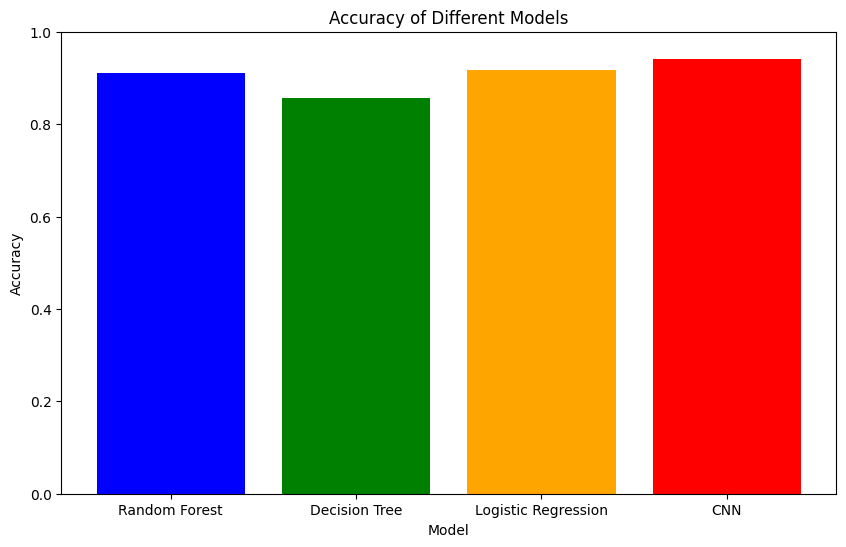

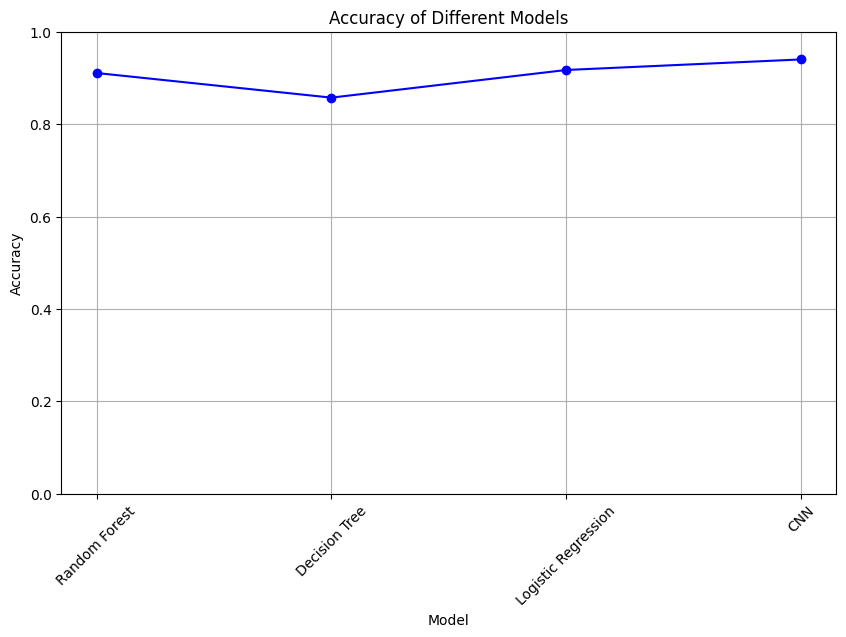

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Load the dataset
df = pd.read_csv('fake_and_real_news_dataset.csv')

# Explore the data
print(df.head())
print(df.info())

# Data preprocessing
# Remove any missing values
df = df.dropna()

# Define feature and target variables
X = df['text']
y = df['label']

# Convert labels to numerical format using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.75)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Sort the indices of the sparse matrices
X_train_tfidf.sort_indices()
X_test_tfidf.sort_indices()

# Define models and their names
models = [
    RandomForestClassifier(n_estimators=100),
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=1000)
]
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression']

# Train and evaluate each model
accuracies = []
for model, name in zip(models, model_names):
    print(f"{name} Classifier:")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Convolutional Neural Network (CNN)
# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
maxlen = 500
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

# Build CNN model
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("CNN Model:")
cnn_model.summary()

# Train CNN model
cnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test)
print("CNN Model Accuracy:", cnn_accuracy)

# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names + ['CNN'], accuracies + [cnn_accuracy], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()


# Plotting line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names + ['CNN'], accuracies + [cnn_accuracy], marker='o', color='blue', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
